In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import fbprophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
df = pd.read_csv('/content/daily-total-female-births-CA.csv')
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
df = pd.read_csv('/content/daily-total-female-births-CA.csv' , parse_dates = ['date'] , date_parser=pd.to_datetime)
df.columns = ['ds' , 'y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 1.0, 'Daily Female Births in 1959')

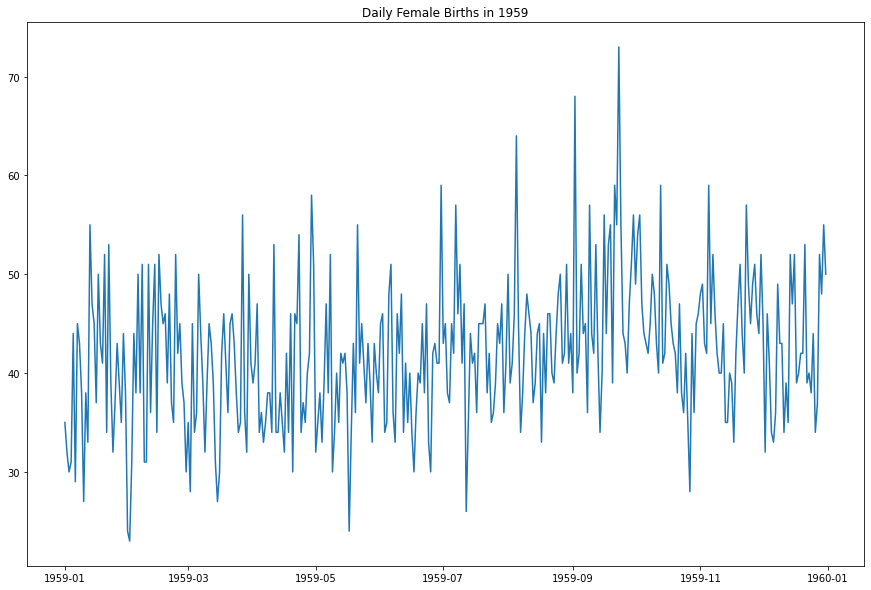

In [9]:
plt.figure(figsize = (15,10))
plt.plot(df['ds'] , df['y'])
plt.title('Daily Female Births in 1959')

In [11]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  m = fbprophet.Prophet(yearly_seasonality=True , daily_seasonality=False , changepoint_range= 0.9, changepoint_prior_scale=0.5 , 
                        seasonality_mode = 'multiplicative')
  m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [12]:
future = m.make_future_dataframe(periods=50 , freq = 'd')
forecast = m.predict(future)

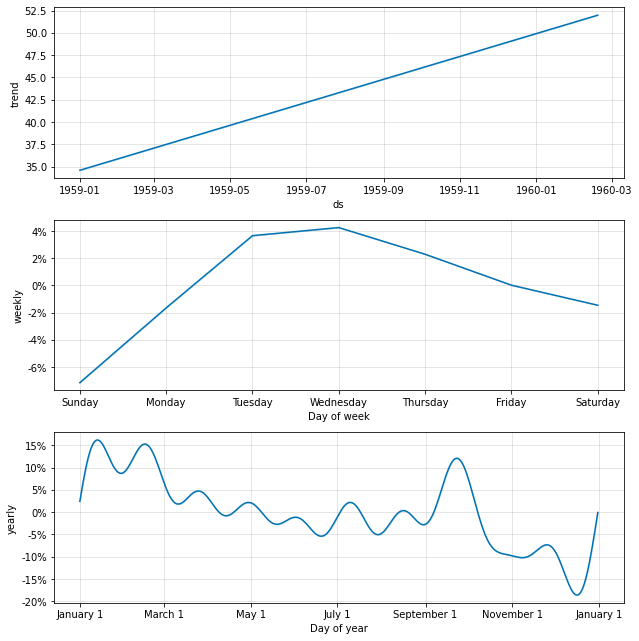

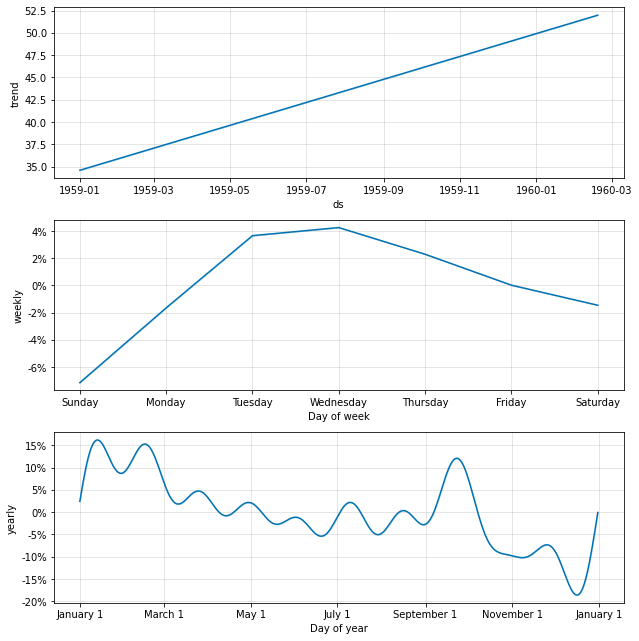

In [14]:
m.plot_components(forecast)

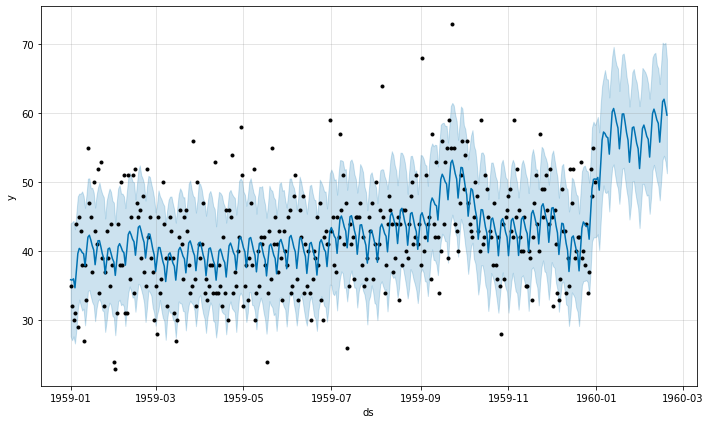

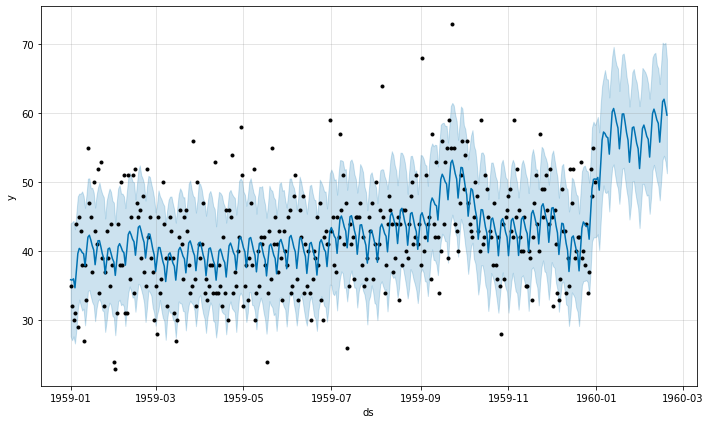

In [15]:
m.plot(forecast)